In [170]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

array([[2.56183470e-04, 1.45461736e-03, 5.66711043e-03, 1.74588473e-02,
        4.50516581e-02],
       [3.76940965e-04, 2.08377489e-03, 7.88695716e-03, 2.35399838e-02,
        5.86293690e-02],
       [5.51714864e-04, 2.96901781e-03, 1.09156754e-02, 3.15583001e-02,
        7.58483958e-02],
       [8.01216066e-04, 4.19588715e-03, 1.49786781e-02, 4.19281002e-02,
        9.71899061e-02],
       [1.15311660e-03, 5.87359613e-03, 2.03472413e-02, 5.51048286e-02,
        1.23080898e-01],
       [1.64382706e-03, 8.13893182e-03, 2.73391696e-02, 7.15653847e-02,
        1.53831231e-01],
       [2.32055909e-03, 1.11600069e-02, 3.63163648e-02, 9.17795041e-02,
        1.89559851e-01],
       [3.24364379e-03, 1.51394491e-02, 4.76780810e-02, 1.16171080e-01,
        2.30113234e-01],
       [4.48904553e-03, 2.03165046e-02, 6.18486348e-02, 1.45069151e-01,
        2.74981544e-01],
       [6.15097107e-03, 2.69674234e-02, 7.92584568e-02, 1.78649425e-01,
        3.23220532e-01],
       [8.34442598e-03, 3.5403

[0.9999999767771441,
 2.999999401944479,
 4.999989530390851,
 6.999883168882482,
 8.999060606903187]

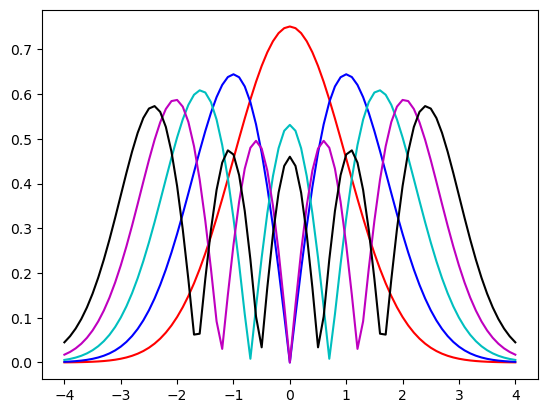

In [171]:
tol = 1e-6 #tolerance
col = ['r', 'b', 'c', 'm', 'k']
values = []
functions = []
epstart = 0.1
L = 4
xspan = np.arange(-L, L+0.1,0.1)
def shoot(y, x, ep):
    return[y[1], (x**2 - ep)*y[0]]
for modes in range(1,6):
    epsilon = epstart
    depsilon = 0.2
    for _ in range(1000):
        yo = [1,np.sqrt(L**2 - epsilon)]
        y = odeint(shoot, yo, xspan, args=(epsilon,))
        if abs(y[-1,1] + np.sqrt(L**2 - epsilon)*y[-1,0]) < tol:
            values.append(epsilon)
            break
        if ((-1)**(modes+1)*(y[-1,1]+np.sqrt(L**2 - epsilon)*y[-1,0])) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon
            depsilon = depsilon/2
    epstart = epsilon + 0.1
    norm = np.trapz(y[:,0]*y[:,0],xspan)
    func = abs(y[:,0] / np.sqrt(norm))
    functions.append(func)
    plt.plot(xspan, func, col[modes -1])
A1 = np.array(functions).T
A2 = values
display(A1,A2)



In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.sparse.linalg import eigs


# Parameters
L=4
xspan = np.arange(-L,L+0.1,0.1)
eps_start=0.1
N = len(xspan) - 2
d_x = xspan[1] - xspan[0]

eigenvalues=[]
eigenfunctions=[]
A = np.zeros((N,N))

for i in range(N):
    A[i,i] = (-2 - d_x**2 * xspan[i+1] **2)
    if i < N-1:
        A[i,i+1] = 1
        A[i+1,i] = 1

A[0,0] += 4/3
A[0,1] -= 1/3
A[N-1, N-1] += 4/3
A[N-1,N-2] -= 1/3
eigenvalues, eigenfunctions = eigs(-A, k=5, which='SM')
phi_0 = (4/3) * eigenfunctions[0,:] - (1/3) * eigenfunctions[1,:]
phi_N = (4/3) * eigenfunctions[-1,:] - (1/3) * eigenfunctions[-2,:]
eigenfunctions = np.vstack([phi_0, eigenfunctions, phi_N])
y_sol_b = np.zeros((N+2, 5))
E_sol_b = np.zeros(5)

for i in range(5):
    norm = np.trapz(eigenfunctions[:,0] * eigenfunctions[:,0], xspan)
    y_sol_b[:,i] = abs(eigenfunctions[:,i]/norm)
E_sol_b = eigenvalues[:5]/ (d_x**2)  
A3 = np.abs(y_sol_b)
A4 = np.real(E_sol_b)
display(A4)

array([0.99937352, 2.996839  , 4.99140656, 6.98038865, 8.95060003])

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
L=2
xspan = np.linspace(-L,L,41)
N = len(xspan)

E_sol_c_pos = np.zeros(2)
E_sol_c_neg= np.zeros(2)
y_sol_c_pos = np.zeros((N,2))
y_sol_c_neg = np.zeros((N,2))
def hw3_rhs_c (y,x,eps,gama):
    return [y[1], (gamma*y[0]**2 + x**2 - eps)*y[0]]
for gamma in [-.05, 0.05]:
    eps_init = 0.1
    for modes in range(1,3):
        A = 1e-6
        dA = 0.01
        for jj in range(100):
            eps = eps_init
            d_eps = 0.2
            for j in range(100):
                Y0 = [A,np.sqrt(L**2 - eps)*A]
                sol = solve_ivp(lambda x, y: hw3_rhs_c(y,x,eps,gamma), t_span=[-L,L], y0=Y0, t_eval=xspan)
                yS = sol.y.T
                xS = sol.t

                bc = yS[-1,1] + np.sqrt(L**2 - eps) * yS[-1,0]
                if abs(bc) < tol:
                    break
                if (-1)**(modes+1)*bc > 0:
                    eps += d_eps
                else:
                    eps -= d_eps
                    d_eps /= 2
            area = np.abs(np.trapz(yS[:,0]**2,x=xS))
            if abs(area - 1) < tol:
                break
            if area < 1:
                A += dA
            else:
                A -= dA / 2
                dA / 2
        eps_init = eps+0.2
        if gamma >0:
            #Save Pos value abs(e - vecs)
            E_sol_c_pos[modes - 1] = eps
            y_sol_c_pos[:,modes -1] = np.abs(yS[:,0]/np.sqrt(area))

        if gamma < 0:
            #Save neg value abs(e - vecs)
            E_sol_c_neg[modes - 1] = eps
            y_sol_c_neg[:,modes -1] = np.abs(yS[:,0] / np.sqrt(area))
A5 = y_sol_c_pos
A6 = E_sol_c_pos
A7 = y_sol_c_neg
A8 = E_sol_c_neg